In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import statistics as stat
from scipy import stats
from scipy.optimize import curve_fit
from tqdm import tqdm

In [77]:
def initialize_lattice(L):
    """Initialize a random spin lattice of size LxL"""
    return np.random.choice([-1, 1], size=(L, L))

def compute_energy_difference(lattice, i, j):
    """Compute energy change if spin at (i,j) is flipped"""
    s = lattice[i, j]
    # Periodic boundary conditions
    L = lattice.shape[0]
    neighbors = (lattice[(i+1)%L, j] + lattice[(i-1)%L, j] + lattice[i, (j+1)%L] + lattice[i, (j-1)%L])
    return 2 * s * (J * neighbors)

def metropolis_sweep(lattice,T):
    """Perform one Monte Carlo sweep through the lattice"""
    L = lattice.shape[0]
    for i in range(L):
        for j in range(L):
            delta_E = compute_energy_difference(lattice, i, j)
            if delta_E <= 0 or np.random.random() < np.exp(-delta_E / T):
                lattice[i, j] *= -1  # Flip the spin
    return lattice

def calculate_energy(lattice):
    """Calculate total energy of the configuration"""
    energy = 0.0
    L = lattice.shape[0]
    for i in range(L):
        for j in range(L):
            s = lattice[i, j]
            neighbors = (lattice[(i+1)%L, j] + lattice[(i-1)%L, j] + lattice[i, (j+1)%L] + lattice[i, (j-1)%L])
            energy += -J * s * neighbors / 2  # Divide by 2 to avoid double counting
    return energy / (L**2)  # Energy per spin

def calculate_magnetization(lattice):
    """Calculate magnetization of the configuration"""
    return np.mean(lattice)

def ising_simulation(T):
    """Run Ising model Monte Carlo simulation
    Args:
    T: temperature
    
    Returns:
    lattice: final configuration
    energies: measured energies
    magnetizations: measured magnetizations
    """
    # Initialize
    lattice = initialize_lattice(L)
    energies = []
    magnetizations = []
    
    # Simulation loop
    for mcs in range(mcs_max):
        lattice = metropolis_sweep(lattice, T)
        
        # Take measurements after equilibration
        if mcs % n_s == 0:
            energies.append(calculate_energy(lattice))
            magnetizations.append(calculate_magnetization(lattice))
    
    return lattice, np.array(energies), np.array(magnetizations)

def plot_results(lattice, energies, magnetizations, T):
    """Plot simulation results"""
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.imshow(lattice, cmap='RdPu', vmin=-1, vmax=1)
    plt.title(f"Final Configuration (T = {T:.2f})")
    plt.colorbar()
    
    steps = np.arange(0,mcs_max,n_s)
    plt.subplot(132)
    plt.scatter(steps, energies, alpha=0.5, edgecolors='black', linewidths=0.5)
    plt.title("Energy per Spin")
    plt.xlabel("Measurement Step")
    plt.ylabel("Energy")
    
    plt.subplot(133)
    plt.scatter(steps, magnetizations, alpha=0.5, edgecolors='black', linewidths=0.5)
    plt.title("Magnetization")
    plt.xlabel("Measurement Step")
    plt.ylabel("Magnetization")
    
    plt.tight_layout()
    plt.show()


In [62]:
'''Parameters:
- L: lattice size
- J: coupling constant
- T: temperature
- h: external field
To measure energy and magnetization:
- mcs_max: total Monte Carlo steps
- n_0: equilibration steps [The number of steps to skip at the beginning (equilibration phase). Early steps are ignored because the system hasn’t yet reached thermal equilibrium.]
- n_s: interval between measurements
Assuming k_B=1 '''
L=100
J=1.0 # Ferromagnetic
T_critical = 2.269  # Critical temperature for square lattice
mcs_max=1000
n_0=100
n_s=10


Simulating at T = 1.00


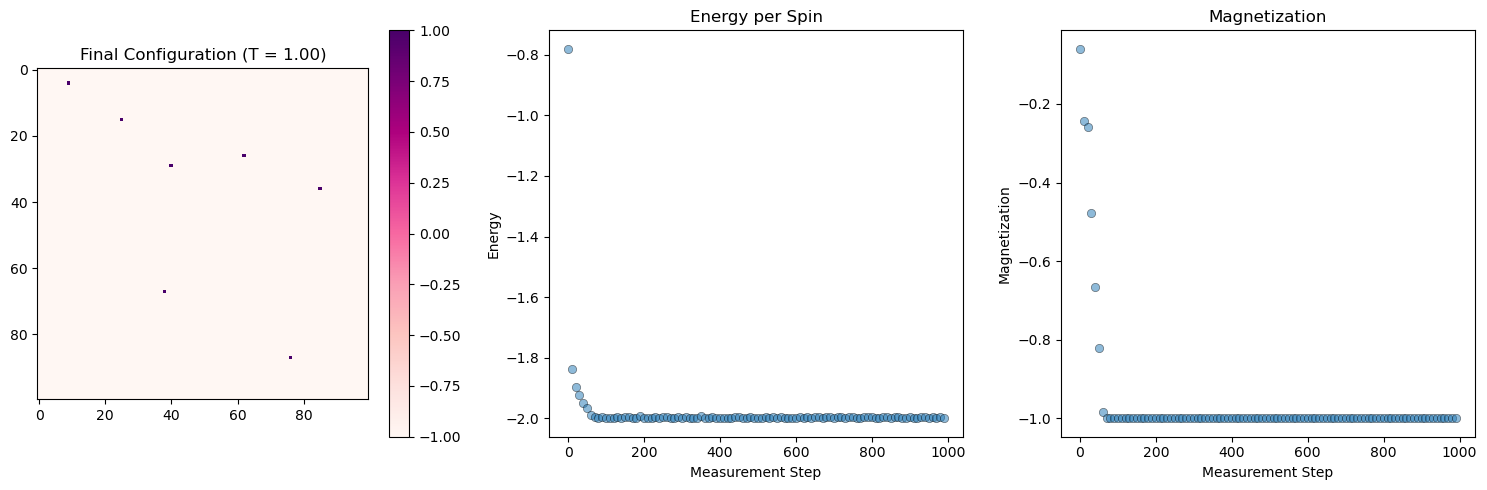


Simulating at T = 2.27


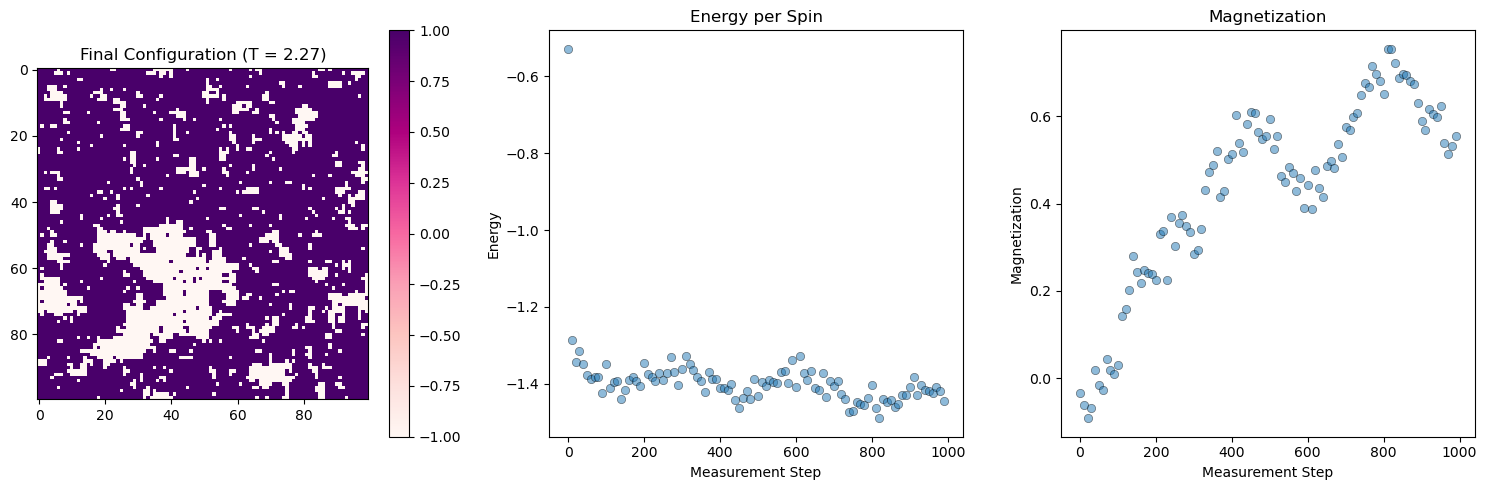


Simulating at T = 3.00


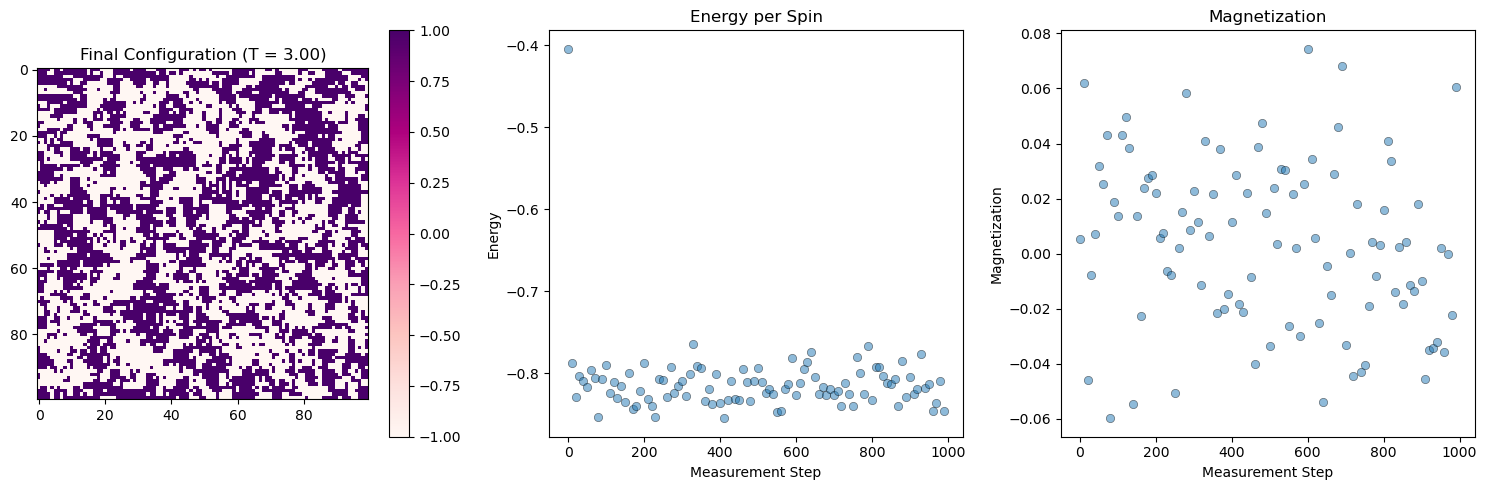

In [61]:
# Run simulations at different temperatures
for T in [1.0, T_critical, 3.0]:
    print(f"\nSimulating at T = {T:.2f}")
    final_lattice, energies, magnetizations = ising_simulation(T)
    plot_results(final_lattice, energies, magnetizations, T)

In [ ]:
def boltzmann_distribution(E, A, T):
    """Boltzmann distribution function: P(E) = A * e^(-E/T)"""
    return A * np.exp(-E / T)

def plot_results_2(lattice, energies, magnetizations, T):
    # Create 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    plt.suptitle('Ising Model Analysis', fontsize=16)
    
    # Subplot 1: Final Configuration
    axs[0, 0].imshow(lattice, cmap='RdPu', vmin=-1, vmax=1)
    axs[0, 0].set_title(f"Final Configuration (T = {T:.2f})")
    axs[0, 0].axis('off')
    axs[0,0].set_title(f"Final Configuration (T = {T:.2f})")
    #colorbar for the first subplot
    cbar = plt.colorbar(axs[0, 0].imshow(lattice, cmap='RdPu', vmin=-1, vmax=1), ax=axs[0, 0])

    steps = np.arange(0, mcs_max, n_s)
    # Subplot 2: Energy
    axs[0, 1].scatter(steps, energies, alpha=0.5, edgecolors='black', linewidths=0.5)
    axs[0, 1].set_title("Energy per Spin")
    axs[0, 1].set_xlabel("Measurement Step")
    axs[0, 1].set_ylabel("Energy")

    # Subplot 3: Magnetization
    axs[1, 0].scatter(steps, magnetizations, alpha=0.5, edgecolors='black', linewidths=0.5)
    axs[1, 0].set_title("Average Magnetization")
    axs[1, 0].set_xlabel("Measurement Step")
    axs[1, 0].set_ylabel("Magnetization")
    
    # Subplot 4: Boltzmann Distribution
    # Normalize energies to start near 0 (for better fitting)
    min_energy = np.min(energies)
    normalized_energies = energies - min_energy

    # Create histogram of energies
    counts, bin_edges = np.histogram(normalized_energies, bins=30, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Fit the histogram to the Boltzmann distribution
    #popt, pcov = curve_fit(boltzmann_distribution, bin_centers, counts, p0=[1, T])

    # Plot the results
    axs[1, 1].bar(bin_centers, counts, width=np.diff(bin_edges), label='Simulation Data', alpha=0.7, color='skyblue')
    #axs[1, 1].plot(bin_centers, boltzmann_distribution(bin_centers, *popt), 'r-', linewidth=2, label=f'Boltzmann Fit (T={popt[1]:.2f})')
    axs[1, 1].set_xlabel('Energy (normalized)')
    axs[1, 1].set_ylabel('Probability Density')
    axs[1, 1].set_title('Energy Distribution vs. Boltzmann Prediction')
    axs[1, 1].legend()
    axs[1, 1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### Cumulant = $1-\frac{\langle m^4 \rangle _L}{3 (\langle m^2 \rangle)^2 _L}$

In [72]:
def get_cumulant(T):  # Check cumulant at critical temperature
    """Calculate the cumulant for the given temperature T"""
    # Run simulation
    final_lattice, energies, magnetizations = ising_simulation(T)
    
    m2 = magnetizations**2
    m4 = magnetizations**4
    cumulant = 1 - np.mean(m4) / (3 * (np.mean(m2))**2)
    
    return cumulant

In [73]:
T_critical = 2.269  # Critical temperature for square lattice
T_steps = np.arange(0.01, 2, 0.1)*T_critical
L = 50
cummulants_50 = []
for T in T_steps:
    cummulants_50.append(get_cumulant(T))

L = 100
cummulants_100 = []
for T in T_steps:
    cummulants_100.append(get_cumulant(T))

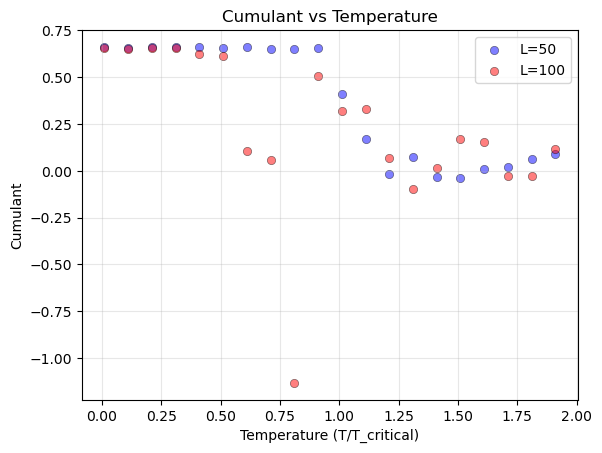

In [74]:
plt.scatter(T_steps/T_critical, cummulants_50, label='L=50', color='blue', alpha=0.5, edgecolors='black', linewidths=0.5)
plt.scatter(T_steps/T_critical, cummulants_100, label='L=100', color='red', alpha=0.5, edgecolors='black', linewidths=0.5)
plt.title('Cumulant vs Temperature')
plt.xlabel('Temperature (T/T_critical)')
plt.ylabel('Cumulant')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## 2nd trial

In [104]:
def calculate_cumulant(L, T):
    """Modified Ising simulation that returns magnetization moments"""
    lattice = initialize_lattice(L)
    m2_list, m4_list = [], []
    
    for mcs in range(mcs_max):
        # Metropolis sweep (same as before)
        lattice = metropolis_sweep(lattice, T)
        
        if mcs >= n_0:
            # Calculate magnetization
            m = np.mean(lattice)
            m2_list.append(m**2)
            m4_list.append(m**4)
    
    # Calculate averages
    m2 = np.mean(m2_list)
    m4 = np.mean(m4_list)
    return 1 - m4/(3*m2**2)

def cumulant_analysis(L_pairs, T_range):
    """Perform cumulant analysis for critical temperature determination"""
    plt.figure(figsize=(10, 6))
    
    # Store cumulant pairs together
    results = {pair: {'temps': [], 'ratios': []} for pair in L_pairs}
    
    for T in tqdm(T_range, desc="Analyzing temperatures"):
        for L1, L2 in L_pairs:
            UL1 = calculate_cumulant(L1, T)
            UL2 = calculate_cumulant(L2, T)
            results[(L1,L2)]['temps'].append(T)
            results[(L1,L2)]['ratios'].append(UL1/UL2)
    
    # Plot cumulant ratios
    for pair in L_pairs:
        plt.plot(results[pair]['temps'], results[pair]['ratios'], 
                'o-', label=f'{pair[0]}/{pair[1]}')
    
    # Exact critical temperature line
    Tc_exact = 2/np.log(1+np.sqrt(2))
    plt.axvline(Tc_exact, color='k', linestyle='--', label=f'Exact $T_c$ = {Tc_exact:.4f}')
    
    plt.xlabel('Temperature (T)')
    plt.ylabel('$U_L / U_{L\'}$')
    plt.title('Binder Cumulant Ratio Analysis')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Parameters
L_pairs = [(8, 16), (16, 32), (32, 64)]  # Pairs of system sizes
T_range = np.linspace(2.0, 2.5, 15)      # Temperature range around Tc

# Run analysis
cumulant_analysis(L_pairs, T_range)

Analyzing temperatures: 100%|██████████| 20/20 [10:57<00:00, 32.87s/it]


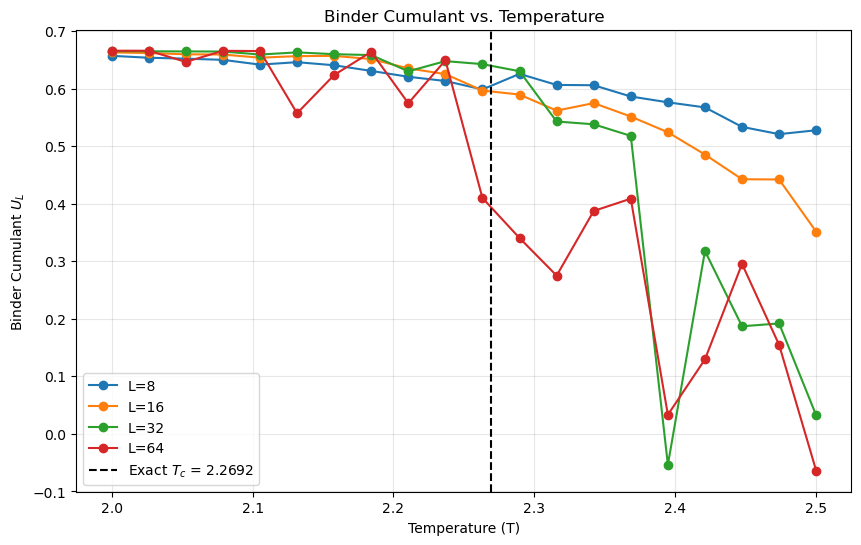

In [ ]:
def plot_binder_cumulants(L_list, T_range):
    """
    Plot Binder cumulants U_L vs. T for multiple system sizes L.
    The crossing point estimates the critical temperature T_c.
    """
    plt.figure(figsize=(10, 6))
    
    # Store cumulant values for each L
    cumulants = {L: [] for L in L_list}
    
    for T in tqdm(T_range, desc="Analyzing temperatures"):
        for L in L_list:
            U_L = calculate_cumulant(L, T)
            cumulants[L].append(U_L)
    
    # Plot U_L for each L
    for L in L_list:
        plt.plot(T_range, cumulants[L], 'o-', label=f'L={L}')
    
    # Exact critical temperature line
    Tc_exact = 2 / np.log(1 + np.sqrt(2))
    plt.axvline(Tc_exact, color='k', linestyle='--', label=f'Exact $T_c$ = {Tc_exact:.4f}')
    
    plt.xlabel('Temperature (T)')
    plt.ylabel('Binder Cumulant $U_L$')
    plt.title('Binder Cumulant vs. Temperature')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Parameters                                
L_list = [8, 16, 32, 64, 128]  # System sizes to compare
T_range = np.linspace(2.0, 2.5, 10)  # Temperature range around T_c

# Run analysis
plot_binder_cumulants(L_list, T_range)

In [90]:
mcs_max = 5000
n_0 = 1000
n_s = 50

### Suscetibility

In [93]:
def calculate_susceptibility(L, T):
    """
    Calculate magnetic susceptibility for a single (L, T) pair
    χ = (⟨m²⟩ - ⟨m⟩²) * N / T, where N = L² is the number of spins
    """
    lattice = initialize_lattice(L)
    m_list = []
    m2_list = []
    
    for mcs in range(mcs_max):
        lattice = metropolis_sweep(lattice, T)
        if mcs >= n_0 and mcs%n_s == 0:  # After equilibration
            m = np.mean(lattice)
            m_list.append(m)
            m2_list.append(m**2)
    
    m_avg = np.mean(m_list)
    m2_avg = np.mean(m2_list)
    chi = (m2_avg - m_avg**2) * (L**2) / T
    return chi

def run_susceptibility_analysis(L_list, T_range):
    """
    Run susceptibility calculation for multiple L and T values
    """
    chi_data = {L: [] for L in L_list}
    
    for T in tqdm(T_range, desc="Temperature"):
        for L in L_list:
            chi = calculate_susceptibility(L, T)
            chi_data[L].append(chi)
    
    return chi_data

In [ ]:
# Parameters
L_list = [8, 16, 32, 64, 128]  # System sizes
T_range = np.linspace(2.0, 3.0, 25)  # Temperature range around Tc

# Run analysis
chi_data = run_susceptibility_analysis(L_list, T_range)

Temperature: 100%|██████████| 25/25 [40:49<00:00, 97.97s/it] 


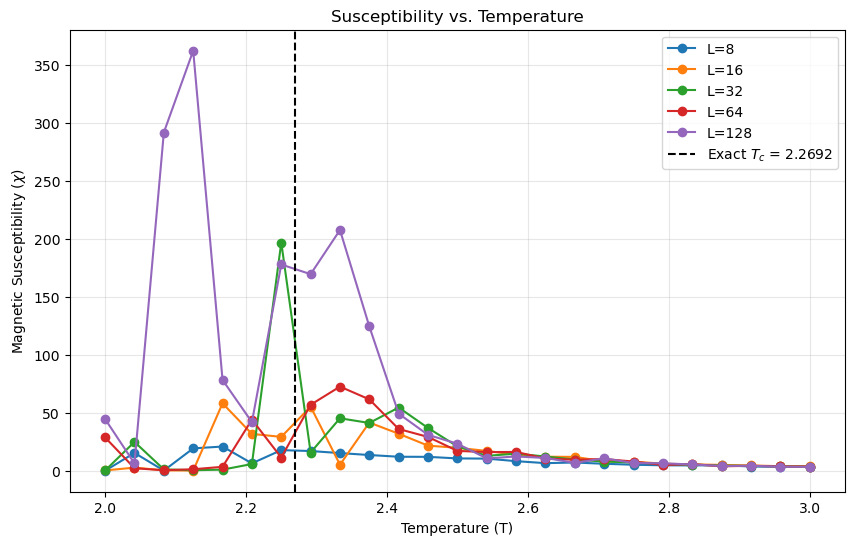

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))
for L in L_list:
    plt.plot(T_range, chi_data[L], 'o-', label=f'L={L}')

# Mark exact critical temperature
Tc_exact = 2/np.log(1 + np.sqrt(2))
plt.axvline(Tc_exact, color='k', linestyle='--', label=f'Exact $T_c$ = {Tc_exact:.4f}')

plt.xlabel('Temperature (T)')
plt.ylabel('Magnetic Susceptibility ($\chi$)')
plt.title('Susceptibility vs. Temperature')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
L_range = [10, 20, 30, 50]  # System sizes
T_range = np.arange(2.1, 2.5, 0.01)
for L in L_range:
    
    chi = calculate_susceptibility(L, T)

In [95]:
# Parameters
L_list = [10, 30, 50]  # System sizes
T_range = np.linspace(2.1, 2.5, 20)  # Temperature range around Tc

# Run analysis
chi_data = run_susceptibility_analysis(L_list, T_range)

Temperature: 100%|██████████| 20/20 [27:38<00:00, 82.91s/it]


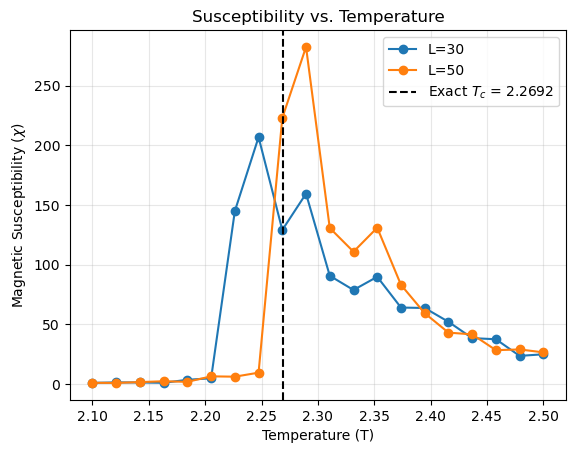

In [102]:
# Plot results
#plt.figure(figsize=(10, 6))
for L in L_list[1:]:
    plt.plot(T_range, chi_data[L], 'o-', label=f'L={L}')

# Mark exact critical temperature
Tc_exact = 2/np.log(1 + np.sqrt(2))
plt.axvline(Tc_exact, color='k', linestyle='--', label=f'Exact $T_c$ = {Tc_exact:.4f}')

plt.xlabel('Temperature (T)')
plt.ylabel('Magnetic Susceptibility ($\chi$)')
plt.title('Susceptibility vs. Temperature')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Auto Correlation Time

In [ ]:
# Magnetization Time Series
def get_m_t(lattice, mcs_max=5000, n_0 = 500, T=1.0):
    """Calculate magnetization time series for a given lattice"""
    # Equilibrate first
    for _ in range(n_0):
        lattice = metropolis_sweep(lattice, T)
    m=[]
    for i in range(mcs_max):
        lattice = metropolis_sweep(lattice, T)
        m.append(np.mean(lattice))
    return m

#Auto Correlation Funtion
def autocor_direct(m_t, t_max=100):
    """Calculate auto-correlation function for magnetization time series"""
    n = len(m_t)
    mean = np.mean(m_t)
    var = np.var(m_t)
    autocorr = np.zeros(t_max)
    
    for t in range(t_max):
        if t == 0:
            autocorr[t] = 1.0
        else:
            corr = np.mean((m_t[:n-t] - mean) * (m_t[t:] - mean)) 
            # this is the def of autocorrelation. (1st part - mean) * (2nd part - mean) 
            autocorr[t] = corr / var
    return autocorr

def autocor_fft(m_t, t_max=100):
    """Calculate auto-correlation function using FFT"""
    n = len(m_t)
    mean = np.mean(m_t)
    x = m_t - mean
    
    # Pad to avoid circular correlation
    fft = np.fft.fft(x, n=2*n)
    autocorr = np.fft.ifft(fft * np.conj(fft))[:n].real
    autocorr /= autocorr[0]  # Normalize to C(0)=1
    
    # Truncate if t_max is specified
    if t_max is not None:
        return autocorr[:t_max]
    return autocorr

# Auto correlation Time
def integrated_autocorr_time(autocorr):
    """Calculate auto-correlation time from the auto-correlation function"""
    return 0.5 + np.sum(autocorr[1:])  # Sum from t=1 to cutoff

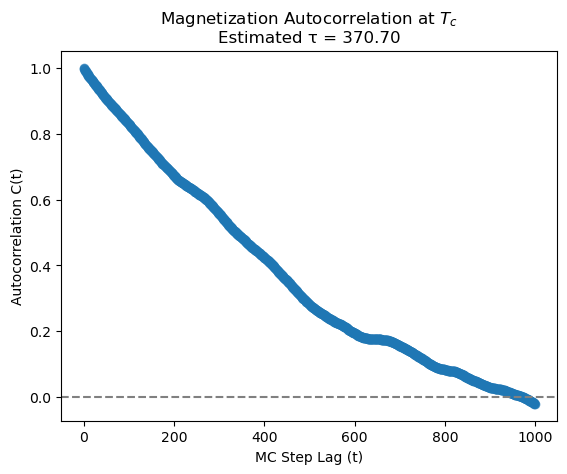

In [140]:
lattice = initialize_lattice(50)
m_t = get_m_t(lattice, mcs_max=5000, n_0=1000, T=2.27)
autocorr = autocor_fft(m_t, t_max=1000)

# Estimate autocorrelation time
tau = integrated_autocorr_time(autocorr)
# Plot
plt.plot(autocorr, 'o-', alpha=0.7, linewidth=0.7)
plt.xlabel('MC Step Lag (t)')
plt.ylabel('Autocorrelation C(t)')
plt.axhline(0, color='gray', linestyle='--')
plt.title(f'Magnetization Autocorrelation at $T_c$\nEstimated τ = {tau:.2f}')
plt.show()

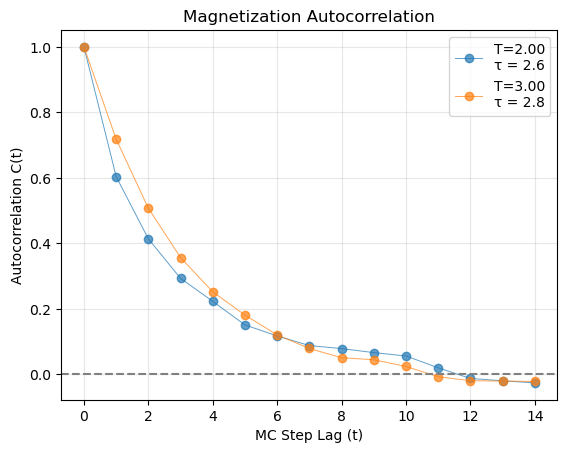

In [132]:
T_range = [2.0, 3.0]  # Example temperatures
for T in T_range:
    lattice = initialize_lattice(50)
    m_t = get_m_t(lattice, mcs_max=5000, n_0=1000, T=T)
    autocorr = autocor_fft(m_t, t_max=15)

    # Estimate autocorrelation time
    tau = integrated_autocorr_time(autocorr)
    # Plot
    plt.plot(autocorr, 'o-', label=f'T={T:.2f}\nτ = {tau:.1f}', alpha=0.7, linewidth=0.7)

plt.xlabel('MC Step Lag (t)')
plt.ylabel('Autocorrelation C(t)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Magnetization Autocorrelation')
plt.show()

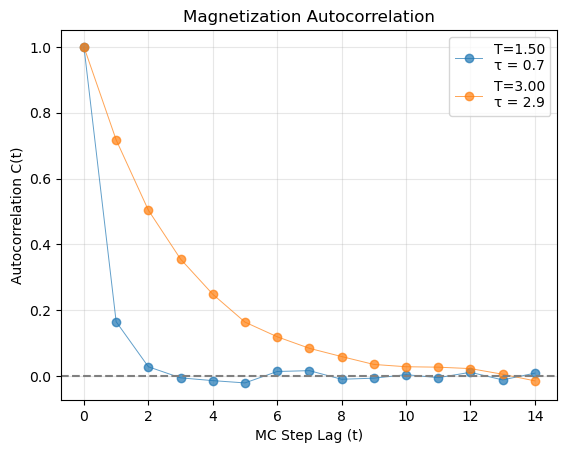

In [141]:
T_range = [1.5, 3.0]  # Example temperatures
for T in T_range:
    lattice = initialize_lattice(50)
    m_t = get_m_t(lattice, mcs_max=5000, n_0=1000, T=T)
    autocorr = autocor_fft(m_t, t_max=15)

    # Estimate autocorrelation time
    tau = integrated_autocorr_time(autocorr)
    # Plot
    plt.plot(autocorr, 'o-', label=f'T={T:.2f}\nτ = {tau:.1f}', alpha=0.7, linewidth=0.7)

plt.xlabel('MC Step Lag (t)')
plt.ylabel('Autocorrelation C(t)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Magnetization Autocorrelation')
plt.show()

## Specific Heat

In [143]:
L = 50
T_range = np.arange(1.5, 3.0, 0.05)
mcs_max = 5000
n_0 = 100
n_s = 10

In [144]:
def simulate_cv(L, T):
    """Simulate and calculate specific heat"""
    lattice = initialize_lattice(L)
    energy_list = []
    
    # Production run
    for _ in range(mcs_max):
        metropolis_sweep(lattice, T)
        if _ > n_0 and _ % n_s == 0:
            energy_list.append(calculate_energy(lattice))
    
    # Compute specific heat from energy fluctuations
    E = np.array(energy_list)
    Cv = (np.mean(E**2) - np.mean(E)**2) / (T**2)  # per spin
    return Cv

In [145]:
# Run simulations
Cv_values = []
for T in tqdm(T_range):
    Cv_values.append(simulate_cv(L, T))

100%|██████████| 30/30 [36:27<00:00, 72.93s/it]


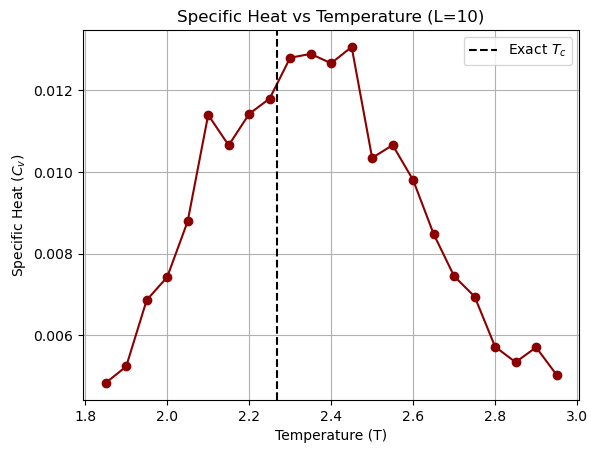

In [ ]:
# Plot
#plt.figure(figsize=(10,6))
plt.plot(T_range[7:], Cv_values[7:], 'o-', color='darkred')
plt.axvline(2.269, color='k', linestyle='--', label='Exact $T_c$')
plt.xlabel('Temperature (T)')
plt.ylabel('Specific Heat ($C_v$)')
plt.title(f'Specific Heat vs Temperature (L={L})')
plt.legend()
plt.grid(True)

In [ ]:
L = 10
T_range = np.arange(1.5, 3.0, 0.05)
mcs_max = 5000
n_0 = 100 
n_s = 10

# Run simulations
Cv_values = []
for T in tqdm(T_range):
    Cv_values.append(simulate_cv(L, T))

100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


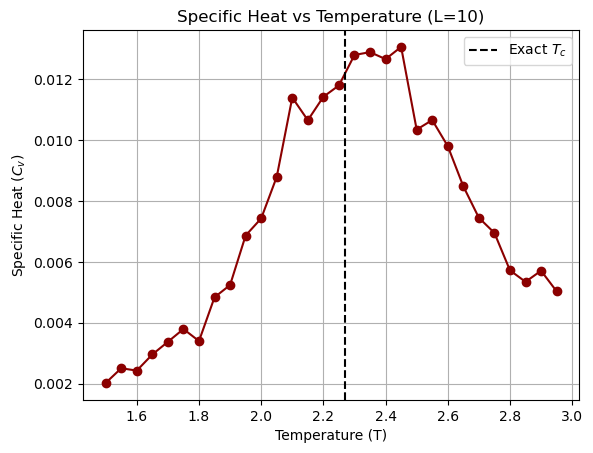

In [151]:
# Plot
#plt.figure(figsize=(10,6))
plt.plot(T_range, Cv_values, 'o-', color='darkred')
plt.axvline(2.269, color='k', linestyle='--', label='Exact $T_c$')
plt.xlabel('Temperature (T)')
plt.ylabel('Specific Heat ($C_v$)')
plt.title(f'Specific Heat vs Temperature (L={L})')
plt.legend()
plt.grid(True)

In [3]:
chi_data = {8: [np.float64(0.5875425170068044),
  np.float64(0.7363670445956135),
  np.float64(1.0912100774616385),
  np.float64(0.9317411050751265),
  np.float64(0.7640517199787754),
  np.float64(1.0483388516245684),
  np.float64(1.2706023809523836),
  np.float64(1.2395598593178758),
  np.float64(1.268276891293428),
  np.float64(1.4541886290940194),
  np.float64(1.6791012404961978),
  np.float64(1.671233037085802),
  np.float64(1.8560494822132678),
  np.float64(1.7891664634407207),
  np.float64(1.8684665990619855),
  np.float64(1.657363830808397),
  np.float64(1.803046536796536),
  np.float64(1.7020446352193572),
  np.float64(1.4979591434206814),
  np.float64(1.6906530612244886)],
 16: [np.float64(1.0214942298347838),
  np.float64(1.4334458805744563),
  np.float64(1.517562143105407),
  np.float64(1.431580039030013),
  np.float64(2.196402566700444),
  np.float64(3.5507950382950346),
  np.float64(4.8217427163969075),
  np.float64(4.724880327641261),
  np.float64(5.9126546135232525),
  np.float64(5.950615837725816),
  np.float64(6.395427001356095),
  np.float64(5.9188752989905655),
  np.float64(5.575646897612551),
  np.float64(5.005253005604759),
  np.float64(4.439466015443444),
  np.float64(4.347095686740955),
  np.float64(3.573250461245104),
  np.float64(3.437227868243107),
  np.float64(3.2735696775751726),
  np.float64(3.0536434712773985)],
 32: [np.float64(0.9581256833090329),
  np.float64(1.0535079483181955),
  np.float64(1.724268043348675),
  np.float64(4.327829148161044),
  np.float64(9.350220783127073),
  np.float64(9.56673517256556),
  np.float64(17.458561223756714),
  np.float64(22.37762698412698),
  np.float64(18.43311689608729),
  np.float64(17.527208180581834),
  np.float64(14.270794594921297),
  np.float64(11.642017868114989),
  np.float64(9.238994983941028),
  np.float64(6.972098248379543),
  np.float64(6.3202162927282695),
  np.float64(5.262990100449689),
  np.float64(4.361723435889507),
  np.float64(3.331784758926025),
  np.float64(2.998438563554119),
  np.float64(3.1266761739417994)],
 64: [np.float64(0.8084292851069784),
  np.float64(1.128582470986399),
  np.float64(2.0805328767798157),
  np.float64(3.9854724128859935),
  np.float64(55.80623832874254),
  np.float64(56.20534910476419),
  np.float64(64.00698331189157),
  np.float64(70.54453678859939),
  np.float64(33.53044821824492),
  np.float64(23.622895319996786),
  np.float64(26.314424376521444),
  np.float64(12.92117166927255),
  np.float64(10.991751984860429),
  np.float64(8.161116120730917),
  np.float64(6.628593405209522),
  np.float64(5.776157537900129),
  np.float64(4.819960065579264),
  np.float64(3.9000386183945888),
  np.float64(3.9596193047022807),
  np.float64(3.2652211356764926)],
 128: [np.float64(952.8769493440235),
  np.float64(17.675912850174225),
  np.float64(50.66036072266407),
  np.float64(26.264224680396513),
  np.float64(135.50698544791425),
  np.float64(84.88722789166735),
  np.float64(116.21133909140973),
  np.float64(89.52546926478657),
  np.float64(40.804407435090226),
  np.float64(23.048556076825914),
  np.float64(18.466836487199043),
  np.float64(13.880708852752287),
  np.float64(8.592641780804183),
  np.float64(7.540587070576557),
  np.float64(6.035920613519088),
  np.float64(4.7803455049269505),
  np.float64(5.219064951008813),
  np.float64(4.802165076535385),
  np.float64(4.124341434521295),
  np.float64(3.0611641695306595)]}

In [4]:
L_list = [8, 16, 32, 64, 128]  # System sizes
T_range = np.linspace(2.1, 2.7, 20)  # Temperature range around Tc

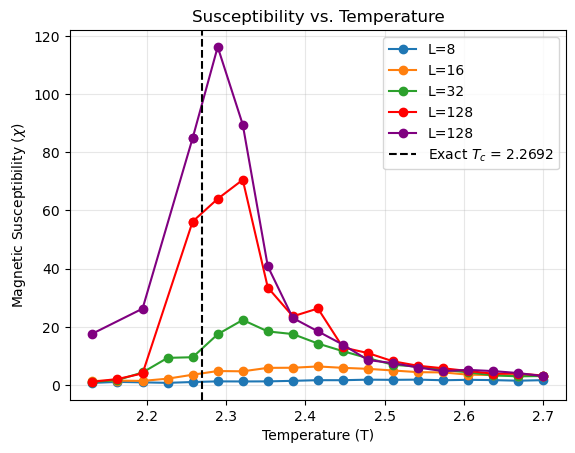

In [11]:
# Plot results
for L in L_list[:-2]:
    plt.plot(T_range[1:], chi_data[L][1:], 'o-', label=f'L={L}')

#plot for L=64
plt.plot(T_range[5:], chi_data[64][5:], 'o-', label=f'L={128}', color='red')
plt.plot(T_range[1:4], chi_data[64][1:4], 'o-', color = 'red')
plt.plot([T_range[3],T_range[5]] , [chi_data[64][3], chi_data[64][5]], 'o-', color = 'red')

#plot for L=128
plt.plot(T_range[5:], chi_data[128][5:], 'o-', label=f'L={128}', color='purple')
#plt.plot(T_range[1:4], chi_data[128][1:4], 'o-', color = 'purple')
plt.plot([T_range[1],T_range[3],T_range[5]] , [chi_data[128][1], chi_data[128][3], chi_data[128][5]], 'o-', color = 'purple')
# Mark exact critical temperature
Tc_exact = 2/np.log(1 + np.sqrt(2))
plt.axvline(Tc_exact, color='k', linestyle='--', label=f'Exact $T_c$ = {Tc_exact:.4f}')

plt.xlabel('Temperature (T)')
plt.ylabel('Magnetic Susceptibility ($\chi$)')
plt.title('Susceptibility vs. Temperature')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Finite size scaling

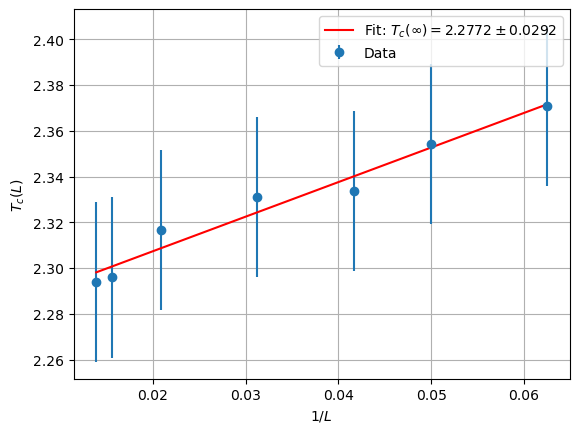

Tc(∞) = 2.27716 ± 0.02921
Slope = 1.51040 ± 0.77315


In [5]:
# Data
L = np.array([16, 20, 24, 32, 48, 64, 72])
Tc = np.array([2.3708, 2.3541, 2.3337, 2.3310, 2.3167, 2.2959, 2.2940])
Tc_err = 0.035  # Uncertainty in Tc

# Compute 1/L
inv_L = 1 / L

# Linear fit function
def linear_func(x, a, b):
    return a * x + b

# Perform the fit (with uncertainties in Tc)
popt, pcov = curve_fit(linear_func, inv_L, Tc, sigma=np.full_like(Tc, Tc_err), absolute_sigma=True)
a, Tc_inf = popt
a_err, Tc_inf_err = np.sqrt(np.diag(pcov))

# Plot
plt.errorbar(inv_L, Tc, yerr=Tc_err, fmt='o', label='Data')
plt.plot(inv_L, linear_func(inv_L, a, Tc_inf), 'r-', label=f'Fit: $T_c(\infty) = {Tc_inf:.4f} \pm {Tc_inf_err:.4f}$')
plt.xlabel('$1/L$')
plt.ylabel('$T_c(L)$')
plt.legend()
plt.grid(True)
plt.show()

print(f"Tc(∞) = {Tc_inf:.5f} ± {Tc_inf_err:.5f}")
print(f"Slope = {a:.5f} ± {a_err:.5f}")